# === Needed imports ===

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Heatmap
import seaborn as sns

# Scikit-Learn Modules
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

# Display all columns
pd.set_option('display.max_columns', 100)

# Extreme Gradient Booster
from xgboost import XGBClassifier

# Load dataset
df = pd.read_csv('../data/Phishing_Legitimate_full.csv')

# === Analyzing the dataset ===

In [2]:
# First 5 entries in the dataframe
df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,21,44,0,0,0,0,0.000,0.250000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,0,2,1,0,41,1,0,0,0,0,0,17,16,103,0,1,0,0.000,0.000000,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,27,24,0,0,0,0,0.375,1.000000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,22,50,0,0,0,1,1.000,0.095238,1,1,0,0,0,0.0,1,0,0,0,1,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1,0,10,29,0,0,0,0,1.000,1.000000,0,0,0,1,0,0.0,1,0,0,0,0,1,0,0,1,1,-1,0,-1,-1,1


In [3]:
# Description of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [4]:
# Special Values
df.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,0.458600,0.277200,0.002300,5.810300,0.988800,0.52520,0.017200,0.022200,0.428900,0.0,18.82430,35.564900,8.606500,0.000900,0.109300,0.057100,0.241334,0.392932,0.167200,0.844000,0.248700,0.1018,0.057600,0.136136,0.215300,0.005500,0.014000,0.004900,0.128800,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,1.344793,1.117356,0.047906,9.617877,0.105241,0.49939,0.130023,0.147341,0.494944,0.0,8.11654,24.588502,24.313053,0.029988,0.368737,0.232045,0.342370,0.387292,0.373173,0.362873,0.432281,0.3024,0.232997,0.312413,0.411051,0.073961,0.117496,0.069832,0.334995,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,4.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.0,14.00000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.0,18.00000,30.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.247511,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.00000,0.000000,0.000000,1.000000,0.0,22.00000,48.000000,0.000000,0.000000,0.000000,0.000000,0.315874,0.785714,0.000000,1.000000,0.000000,0.0000,0.000000,0.047619,0.000000,0.000000,0.000000,

<Axes: xlabel='labels'>

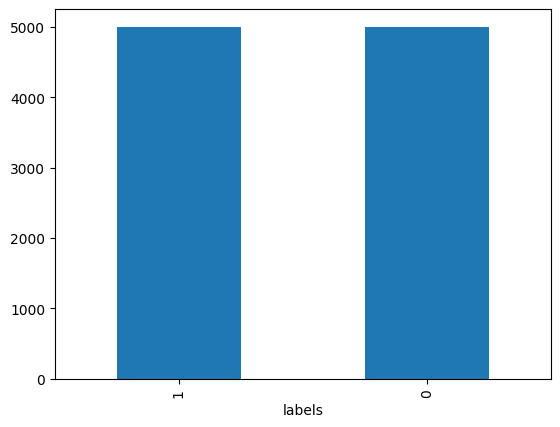

In [5]:
# Label-column = classification (phishing / no phishing)
df.rename(columns={'CLASS_LABEL': 'labels'}, inplace=True)

# Check Count of "Phishing-Entries" and "Non-Phishing-Entries" in the dataframe
df['labels'].value_counts().plot(kind='bar')

In [6]:
# Check if there are null-values in the data
print(df.isnull().sum())

id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0


In [7]:
# Column "id" is not important for training a model
df = df.drop(columns=['id'])

<Axes: >

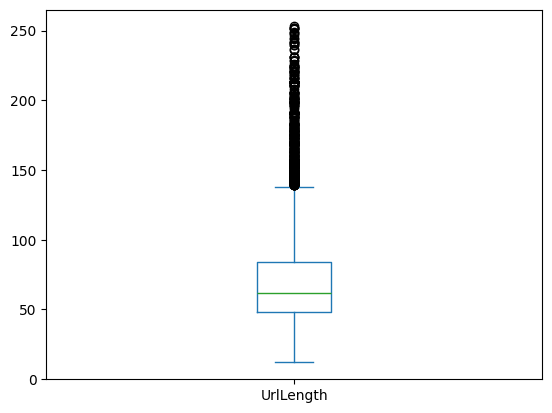

In [8]:
# Spot outliners in "UrlLength"
df['UrlLength'].plot(kind='box')

In [9]:
Q1 = df['UrlLength'].quantile(0.25)
Q3 = df['UrlLength'].quantile(0.75)
IQR = Q3 - Q1
print(f"IQR: {IQR}")

# Outliners = +/- 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['UrlLength'] < lower_bound) | (df['UrlLength'] > upper_bound)]
print(f"Count of Outliners (UrlLength): {len(outliers)}")

IQR: 36.0
Count of Outliners (UrlLength): 446


<Axes: >

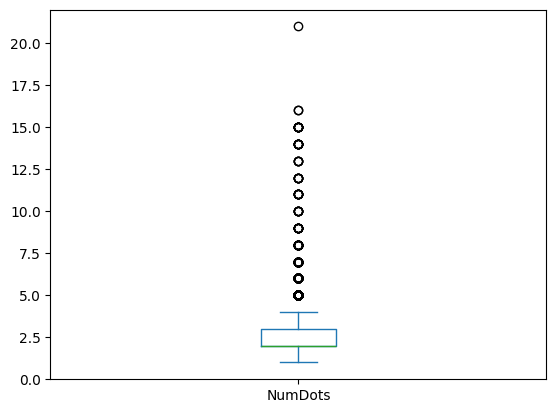

In [10]:
# Spot outliners in "NumDots"
df['NumDots'].plot(kind='box')

In [11]:
Q1 = df['NumDots'].quantile(0.25)
Q3 = df['NumDots'].quantile(0.75)
IQR = Q3 - Q1
print(f"IQR: {IQR}")

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['NumDots'] < lower_bound) | (df['NumDots'] > upper_bound)]
print(f"Count of Outliners (NumDots): {len(outliers)}")

IQR: 1.0
Count of Outliners (NumDots): 470


In [12]:
correlation = df.corr()['labels'].drop('labels').sort_values(ascending=False)

plt.figure(figsize=(8, 15))
sns.heatmap(
    correlation.to_frame(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=1,
    cbar=False  # <–– Colorbar wird nicht angezeigt
)
plt.title("Correlation of Features with 'labels'")
plt.xticks(rotation=45)
plt.tight_layout(pad=2)  # zusätzlicher Platz für Legende und Achsen
plt.savefig("correlation_heatmap.png", dpi=300)
plt.close()


## == Analysis of Empty Column: "HttpsInHostname" ==

In [13]:
# Check unique values
print(df['HttpsInHostname'].value_counts())  

HttpsInHostname
0    10000
Name: count, dtype: int64


In [14]:
# HttpInHostname will be dropped because the correlation cannot be calculated
df = df.drop(columns=['HttpsInHostname'])

# === RandomForest for Calculation of importance of the features ===

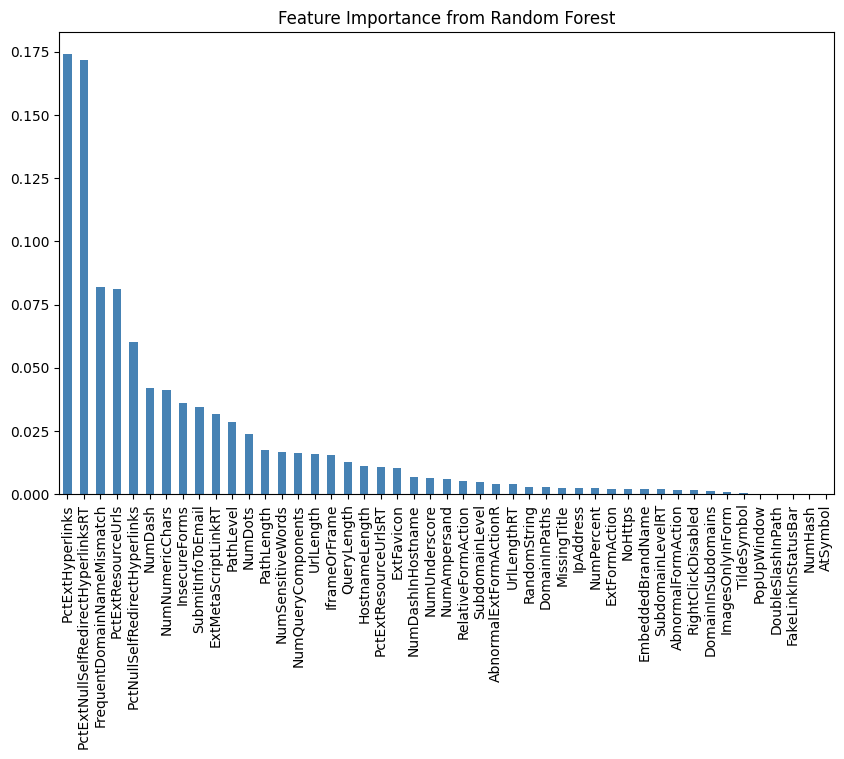

In [15]:
# Features without the result-column "labels"
X = df.drop(columns=['labels'])

# Target-Variable
y = df['labels']

# RandomForest with 100 trees and a specified random-state
model = RandomForestClassifier(n_estimators=100, random_state=77)

model.fit(X, y)

# Extraction of feature-importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar', color='steelblue')
plt.title("Feature Importance from Random Forest")
plt.show()

# === RandomForest with reduced amount of features ===

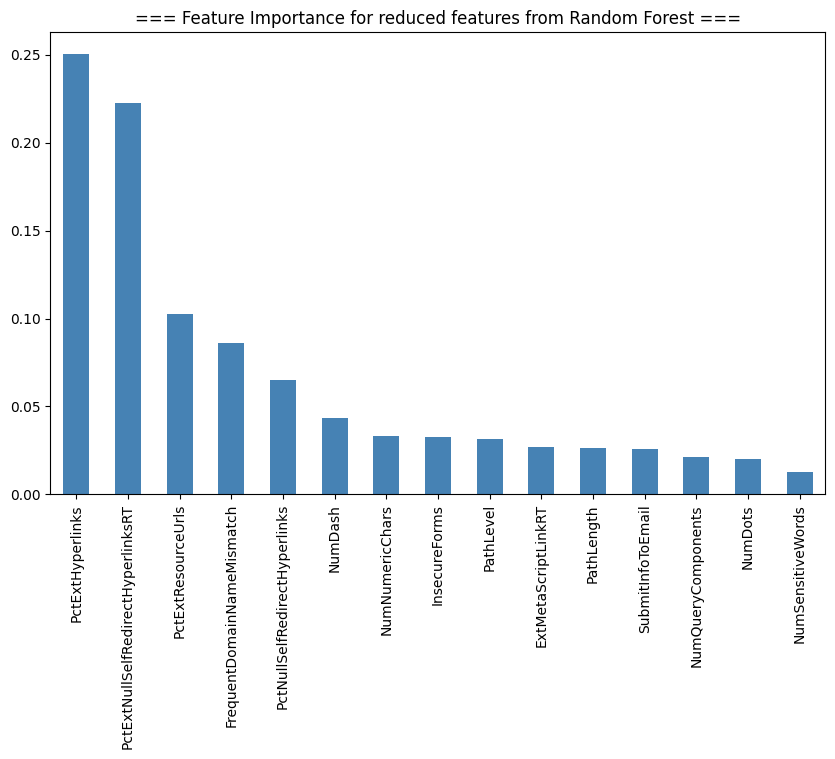

Accuracy: 0.98
F1-Score: 0.98
Report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       985
           1       0.98      0.98      0.98      1015

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



In [16]:
# Top 15 most important features
top_features = feature_importance[:15].index  

# Reduced dataset with only the most important features
X_reduced = df[top_features]

# Split data into training and testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=77)

model_reduced = RandomForestClassifier(n_estimators=100, random_state=77)
model_reduced.fit(X_train, y_train)

y_pred = model_reduced.predict(X_test)

feature_importance = pd.Series(model_reduced.feature_importances_, index=X_reduced.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar', color='steelblue')
plt.title("=== Feature Importance for reduced features from Random Forest ===")
plt.show()

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")
print(f"Report: \n{classification_report(y_test, y_pred)}")

In [17]:
# Cross-Validation with 5 folds

scores = cross_val_score(model_reduced, X_reduced, y, cv=5)

print(f"Cross-Validation Accuracy: {np.mean(scores):.2f} ± {np.std(scores):.2f}")

Cross-Validation Accuracy: 0.97 ± 0.00


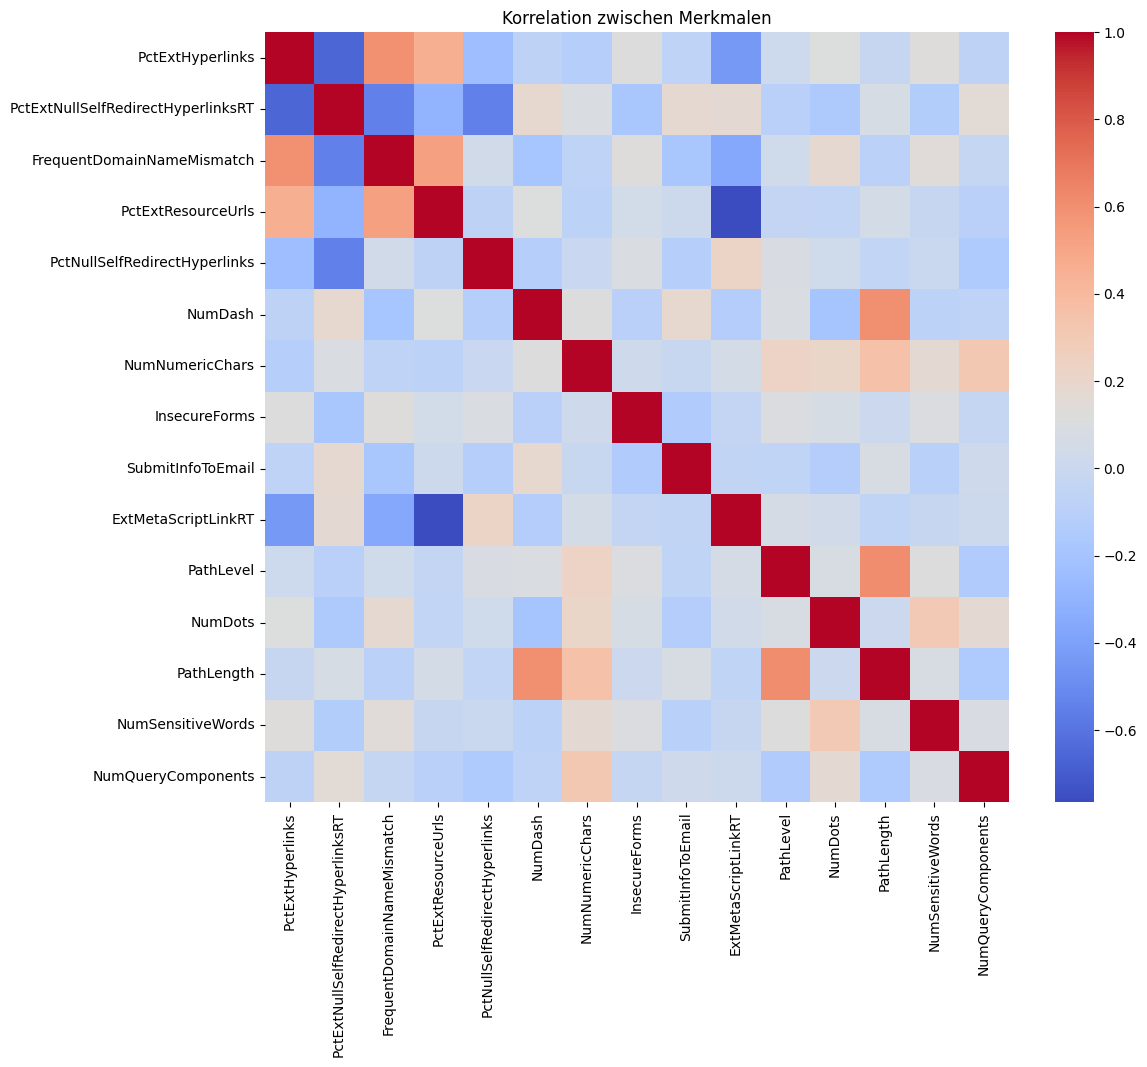

In [18]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[top_features].corr(), cmap="coolwarm", annot=False)
plt.title("Korrelation zwischen Merkmalen")

plt.show()

### == Check correlation for the 15 most important features ==

In [19]:
print(X_reduced.corrwith(y).sort_values(ascending=False))

FrequentDomainNameMismatch            0.463956
PctNullSelfRedirectHyperlinks         0.342806
InsecureForms                         0.316380
NumDots                               0.294111
PctExtHyperlinks                      0.259728
NumSensitiveWords                     0.255208
PathLevel                             0.229450
ExtMetaScriptLinkRT                   0.111150
NumNumericChars                       0.019122
PctExtResourceUrls                   -0.021922
PathLength                           -0.076125
NumQueryComponents                   -0.147391
SubmitInfoToEmail                    -0.357635
NumDash                              -0.372235
PctExtNullSelfRedirectHyperlinksRT   -0.540545
dtype: float64


# === XGBoost with Top-Features ===

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=77)

model_xgb = XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8, eval_metric='logloss')

model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)

print("=== Report ===")
print(classification_report(y_test, y_pred_xgb))

=== Report ===
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       985
           1       0.99      0.99      0.99      1015

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



# === Test the model (all features) with generated data (10 rows) ===

In [21]:
# Let ChatGPT generate 10 rows similar to the original data
df_testset = pd.read_csv("../data/phishing_mini_testset_ten-rows.csv")

X_test = df_testset.drop(columns=["CLASS_LABEL", "HttpsInHostname"])
y_test = df_testset["CLASS_LABEL"]

y_pred = model.predict(X_test)

print("=== Report ===")
print(classification_report(y_test, y_pred))

print("=== Confusionmatrix ===")
print(confusion_matrix(y_test, y_pred))

print("\n=== Misclassifications ===")

df_errors = df_testset[y_pred != y_test]
display(df_errors)

=== Report ===
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.40      0.57         5

    accuracy                           0.70        10
   macro avg       0.81      0.70      0.67        10
weighted avg       0.81      0.70      0.67        10

=== Confusionmatrix ===
[[5 0]
 [3 2]]

=== Misclassifications ===


,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
1,3,2,4,80,1,1,1,0,0,1,1,0,0,5,1,1,0,1,1,0,25,40,10,1,1,1,0.5,0.6,0,1,0,1,1,0.2,1,1,1,0,1,1,0,2,1,0.3,1,0,0.1,1.0,1
5,6,2,6,120,3,2,0,1,0,0,2,0,0,10,1,1,1,1,1,0,35,60,25,1,2,1,0.8,0.9,0,1,1,1,1,0.4,1,1,1,1,1,1,1,2,1,0.6,1,1,0.3,1.0,1
9,4,2,4,85,1,1,1,0,0,1,1,0,0,4,1,1,0,1,1,0,26,38,12,1,1,1,0.4,0.5,0,1,1,1,1,0.2,1,1,1,1,1,1,0,2,1,0.3,1,0,0.1,1.0,1


# === Reserve 5% of the original data for testing ===

In [22]:
# Prepare full feature matrix and labels
X_full_all = df.drop("labels", axis=1)
y_full_all = df["labels"]

# 95% train, 5% test (stratified)
X_train_full, X_eval_full, y_train_full, y_eval_full = train_test_split(
    X_full_all, y_full_all, test_size=0.05, random_state=77, stratify=y_full_all
)

# Train full-feature model on 95% of data
model_full_split = RandomForestClassifier(n_estimators=100, random_state=77)
model_full_split.fit(X_train_full, y_train_full)

# Feature importances from model_full_split
importances_split = pd.Series(model_full_split.feature_importances_, index=X_train_full.columns)
top_features_split = importances_split.sort_values(ascending=False)[:15].index

# Reduce datasets to top features
X_train_reduced = X_train_full[top_features_split]
X_eval_reduced = X_eval_full[top_features_split]

# Train reduced model
model_reduced_split = RandomForestClassifier(n_estimators=100, random_state=77)
model_reduced_split.fit(X_train_reduced, y_train_full)

# Predictions
y_pred_full_split = model_full_split.predict(X_eval_full)
y_pred_reduced_split = model_reduced_split.predict(X_eval_reduced)

# Evaluation: Full-feature model
print("=== Evaluation (Full Feature Model, 5% test split) ===")
print(classification_report(y_eval_full, y_pred_full_split))
print(confusion_matrix(y_eval_full, y_pred_full_split))

# Evaluation: Top-feature model
print("\n=== Evaluation (Top Feature Model, 5% test split) ===")
print(classification_report(y_eval_full, y_pred_reduced_split))
print(confusion_matrix(y_eval_full, y_pred_reduced_split))

=== Evaluation (Full Feature Model, 5% test split) ===
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       250
           1       0.99      0.98      0.98       250

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500

[[248   2]
 [  6 244]]

=== Evaluation (Top Feature Model, 5% test split) ===
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       250
           1       0.98      0.97      0.98       250

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500

[[246   4]
 [  7 243]]


# === Test the model with generated data (100 rows) - but many duplicates ===

In [23]:
# ChatGPT generated 100 rows similar to the original data - but with lots of duplicates
df_testset_100_rows_with_duplicates = pd.read_csv("../data/phishing_testset_hundred-rows.csv")

X_test_full = df_testset_100_rows_with_duplicates.drop(columns=["CLASS_LABEL", "HttpsInHostname"])
X_test_top = X_test_full[top_features]
y_test = df_testset_100_rows_with_duplicates["CLASS_LABEL"]

# Full-feature model prediction
y_pred_full = model.predict(X_test_full)

# Top-feature model prediction
y_pred_top = model_reduced.predict(X_test_top)

print("=== Evaluation: Full-Feature Model ===")
print(classification_report(y_test, y_pred_full))
print(confusion_matrix(y_test, y_pred_full))

print("\n=== Evaluation: Top-Feature Model ===")
print(classification_report(y_test, y_pred_top))
print(confusion_matrix(y_test, y_pred_top))

=== Evaluation: Full-Feature Model ===
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        49
           1       1.00      0.47      0.64        51

    accuracy                           0.73       100
   macro avg       0.82      0.74      0.71       100
weighted avg       0.83      0.73      0.71       100

[[49  0]
 [27 24]]

=== Evaluation: Top-Feature Model ===
              precision    recall  f1-score   support

           0       0.49      1.00      0.66        49
           1       0.00      0.00      0.00        51

    accuracy                           0.49       100
   macro avg       0.24      0.50      0.33       100
weighted avg       0.24      0.49      0.32       100

[[49  0]
 [51  0]]


C:\Users\tkast\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tkast\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tkast\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### == Test the model with generated data (100 rows) - but many duplicates V2 ==

Although the models used (model & model_reduced) have not been modified, a 0% phishing detection raises suspicions.

For this reason, two new models have been trained for this specific case.

In [24]:
# Retrieve the new X from the full csv
X_full_100 = df.drop(columns=["labels"])
y_full_100 = df["labels"]

# Retrieve the new X but only with the 15 top features
X_top_100 = df[top_features]

# Train full modell again
model_full_100 = RandomForestClassifier(n_estimators=100, random_state=77)
model_full_100.fit(X_full_100, y_full_100)

# Train reduced-feature model again
model_top_100 = RandomForestClassifier(n_estimators=100, random_state=77)
model_top_100.fit(X_top_100, y_full_100)

# === Load generated test set (with duplicates) ===

df_testset_100_faulty = pd.read_csv("../data/phishing_testset_hundred-rows.csv")

X_test_full = df_testset_100_faulty.drop(columns=["CLASS_LABEL", "HttpsInHostname"])
X_test_top = X_test_full[top_features]
y_test = df_testset_100_faulty["CLASS_LABEL"]

# === Evaluate full-feature model ===
y_pred_full = model_full_100.predict(X_test_full)

print("=== Evaluation: Full-Feature Model ===")
print(classification_report(y_test, y_pred_full))
print(confusion_matrix(y_test, y_pred_full))

# === Evaluate top-feature model ===
y_pred_top = model_top_100.predict(X_test_top)

print("\n=== Evaluation: Top-Feature Model ===")
print(classification_report(y_test, y_pred_top))
print(confusion_matrix(y_test, y_pred_top))

=== Evaluation: Full-Feature Model ===
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        49
           1       1.00      0.47      0.64        51

    accuracy                           0.73       100
   macro avg       0.82      0.74      0.71       100
weighted avg       0.83      0.73      0.71       100

[[49  0]
 [27 24]]

=== Evaluation: Top-Feature Model ===
              precision    recall  f1-score   support

           0       0.49      1.00      0.66        49
           1       0.00      0.00      0.00        51

    accuracy                           0.49       100
   macro avg       0.24      0.50      0.33       100
weighted avg       0.24      0.49      0.32       100

[[49  0]
 [51  0]]


C:\Users\tkast\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tkast\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tkast\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

These results indicate that the reduced model fails to identify generated phishing samples in this dataset, likely due to insufficient representation of relevant features.

# === Test the model with generated data (100 rows) - unique rows ===

In [25]:
# ChatGPT generated 100 unique rows similar to the original data
df_testset_100_unique = pd.read_csv("../data/phishing_testset_100_unique.csv")

# Input features and labels
X_test_full = df_testset_100_unique.drop(columns=["CLASS_LABEL", "HttpsInHostname"])
y_test = df_testset_100_unique["CLASS_LABEL"]

# Prepare reduced feature input
X_test_top = X_test_full[top_features]

# Predictions
y_pred_full = model.predict(X_test_full)
y_pred_top = model_reduced.predict(X_test_top)

# Full-feature model evaluation
print("=== Evaluation: Full-Feature Model ===")
print(classification_report(y_test, y_pred_full))
print(confusion_matrix(y_test, y_pred_full))

# Top-feature model evaluation
print("\n=== Evaluation: Top-Feature Model ===")
print(classification_report(y_test, y_pred_top))
print(confusion_matrix(y_test, y_pred_top))

=== Evaluation: Full-Feature Model ===
              precision    recall  f1-score   support

         0.0       0.72      1.00      0.84        54
         1.0       1.00      0.54      0.70        46

    accuracy                           0.79       100
   macro avg       0.86      0.77      0.77       100
weighted avg       0.85      0.79      0.78       100

[[54  0]
 [21 25]]

=== Evaluation: Top-Feature Model ===
              precision    recall  f1-score   support

         0.0       0.55      1.00      0.71        54
         1.0       1.00      0.02      0.04        46

    accuracy                           0.55       100
   macro avg       0.77      0.51      0.37       100
weighted avg       0.75      0.55      0.40       100

[[54  0]
 [45  1]]


### == Test the model with generated data (100 rows) - unique rows V2 ==

Again, two new models were trained.

In [26]:
# === Train new models for the unique 100-row test set ===

X_full_unique = df.drop(columns=["labels"])
y_full_unique = df["labels"]

X_top_unique = df[top_features]

# Train full-feature model again
model_full_unique = RandomForestClassifier(n_estimators=100, random_state=77)
model_full_unique.fit(X_full_unique, y_full_unique)

# Train top-feature model again
model_top_unique = RandomForestClassifier(n_estimators=100, random_state=77)
model_top_unique.fit(X_top_unique, y_full_unique)

# === Load generated test set (100 unique rows) ===

df_testset_100_unique = pd.read_csv("../data/phishing_testset_100_unique.csv")

X_test_full = df_testset_100_unique.drop(columns=["CLASS_LABEL", "HttpsInHostname"])
X_test_top = X_test_full[top_features]
y_test = df_testset_100_unique["CLASS_LABEL"]

# === Evaluate full-feature model ===
y_pred_full = model_full_unique.predict(X_test_full)

print("=== Evaluation: Full-Feature Model ===")
print(classification_report(y_test, y_pred_full))
print(confusion_matrix(y_test, y_pred_full))

# === Evaluate top-feature model ===
y_pred_top = model_top_unique.predict(X_test_top)

print("\n=== Evaluation: Top-Feature Model ===")
print(classification_report(y_test, y_pred_top))
print(confusion_matrix(y_test, y_pred_top))

=== Evaluation: Full-Feature Model ===
              precision    recall  f1-score   support

         0.0       0.72      1.00      0.84        54
         1.0       1.00      0.54      0.70        46

    accuracy                           0.79       100
   macro avg       0.86      0.77      0.77       100
weighted avg       0.85      0.79      0.78       100

[[54  0]
 [21 25]]

=== Evaluation: Top-Feature Model ===
              precision    recall  f1-score   support

         0.0       0.54      1.00      0.70        54
         1.0       0.00      0.00      0.00        46

    accuracy                           0.54       100
   macro avg       0.27      0.50      0.35       100
weighted avg       0.29      0.54      0.38       100

[[54  0]
 [46  0]]


C:\Users\tkast\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tkast\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tkast\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# === Reading E-Mails from .eml-Files ===

In [27]:
import re
from urllib.parse import urlparse

# Clamp a value between a minimum and a maximum (used to normalize feature values)
def clamp(value, min_val, max_val):
    return max(min(value, max_val), min_val)

# Extract technical URL-based features from url-list
def extract_url_features(urls):
    features = {
        "NumDots": 0, "SubdomainLevel": 0, "PathLevel": 0, "UrlLength": 0,
        "NumDash": 0, "NumDashInHostname": 0, "AtSymbol": 0, "TildeSymbol": 0,
        "NumUnderscore": 0, "NumPercent": 0, "NumQueryComponents": 0,
        "NumAmpersand": 0, "NumHash": 0, "NumNumericChars": 0, "NoHttps": 0,
        "RandomString": 0, "IpAddress": 0, "HttpsInHostname": 0,
        "HostnameLength": 0, "PathLength": 0, "QueryLength": 0,
        "DoubleSlashInPath": 0,
    }

    for url in urls:
        parsed = urlparse(url)
        hostname = parsed.hostname or ""
        path = parsed.path or ""
        query = parsed.query or ""

        # Counts how often '//' appears inside the path (hidden redirects?)
        features["DoubleSlashInPath"] += path.count("//")

        # 0 / 1 if the hostname itself contains the string "https"
        features["HttpsInHostname"] += int("https" in hostname)

        # 0 / 1 if the hostname is an IP address instead of domain name
        features["IpAddress"] += int(bool(re.match(r"\d+\.\d+\.\d+\.\d+", hostname)))
    
        # Number of key=value components in the query string (e.g., ?a=1&b=2 → 2 components)
        features["NumQueryComponents"] += len(query.split("&")) if query else 0
    
        # 0 / 1 if any path segment is unusually long and lacks vowels (often machine-generated)
        features["RandomString"] += int(any(
            len(part) > 10 and not re.search(r'[aeiou]', part)
            for part in path.split("/")
        ))
    
        # Number of dots in the hostname, minus one to exclude the top-level domain
        features["SubdomainLevel"] += max(0, hostname.count(".") - 1)       
        
        features["AtSymbol"] += url.count("@")
        features["HostnameLength"] += len(hostname) if hostname else 0
        features["NoHttps"] += int(not url.startswith("https"))
        features["NumAmpersand"] += url.count("&")
        features["NumDash"] += url.count("-")
        features["NumDashInHostname"] += hostname.count("-")
        features["NumDots"] += url.count(".")
        features["NumHash"] += url.count("#")
        features["NumNumericChars"] += sum(c.isdigit() for c in url)
        features["NumPercent"] += url.count("%")
        features["NumUnderscore"] += url.count("_")
        features["PathLength"] += len(path)
        features["PathLevel"] += path.count("/")
        features["QueryLength"] += len(query)
        features["TildeSymbol"] += url.count("~")
        features["UrlLength"] += len(url)

    # Clamp selected numeric features to keep them within expected ranges
    features["HostnameLength"] = clamp(features["HostnameLength"], 4, 137)
    features["PathLength"] = clamp(features["PathLength"], 0, 161)
    features["QueryLength"] = clamp(features["QueryLength"], 0, 188)
    features["UrlLength"] = clamp(features["UrlLength"], 12, 253)
    features["SubdomainLevel"] = clamp(features["SubdomainLevel"], 0, 14)
    
    return features

# Calculate the ratio of external hyperlinks and resources in the email body
def calculate_external_link_ratios(body: str, sender: str):
    # Extract Sender-Domain
    sender_domain = sender.split("@")[-1].lower() if sender and "@" in sender else ""

    urls = re.findall(r'https?://[^\s"<>()]+', body)

    # Resource-URLs (src= / href=)
    resource_urls = re.findall(r'(?:src|href)=["\'](https?://[^"\']+)["\']', body.lower())

    # A link is considered external if its domain differs from the senders domain
    def is_external(url, ref_domain):
        parsed = urlparse(url)
        hostname = parsed.hostname or ""
        return ref_domain not in hostname.lower()

    num_ext_links = sum(is_external(u, sender_domain) for u in urls)
    pct_ext_links = (num_ext_links / len(urls)) if urls else 0

    num_ext_resources = sum(is_external(u, sender_domain) for u in resource_urls)
    pct_ext_resources = (num_ext_resources / len(resource_urls)) if resource_urls else 0

    return pct_ext_links, pct_ext_resources

def domain_from_email(email_address):
    if not email_address or "@" not in email_address:
        return ""
    return email_address.split("@")[-1].lower()

# Get the main domain (second-level + top-level) from a full hostname
def get_main_domain(hostname):
    parts = hostname.split(".")
    return ".".join(parts[-2:]) if len(parts) >= 2 else hostname

# Extracts large set of phishing-related features
def extract_features_from_eml(subject, sender, recipient, body, filename=""):
    features = {}

    urls = re.findall(r'https?://[^\s"<>()]+', body)

    known_brands = [
        "paypal", "apple", "amazon", "sparkasse", "dhl", "deutschebank",
        "commerzbank", "ebay", "netflix", "microsoft", "google", "instagram",
        "facebook", "linkedin", "postbank", "visa", "mastercard", "americanexpress",
        "fedex", "ups", "klarna", "telekom", "vodafone", "o2", "spotify", "airbnb"
    ]
    
    sensitive_words = [
        "account", "verify", "secure", "login", "update", "confirm",
        "password", "click", "access", "billing", "bank", "credit", "ssn",
        "social", "security", "alert", "unusual", "attempt", "fraud",
        "locked", "expired", "immediately", "urgent", "attention",
        "suspend", "important", "reset", "re-enter",
    
        "konto", "verifizieren", "sicher", "einloggen", "anmelden",
        "passwort", "aktualisieren", "bestätigen", "zahlung", "abrechnung",
        "kreditkarte", "sofort", "dringend", "wichtig", "gesperrt",
        "abgelaufen", "zugang", "identität", "prüfung", "eingabe",
        "sicherheitsüberprüfung", "reaktivieren", "informationen", "bank",
        "onlinebanking", "pin", "tan", "sicherheitscode", "freischalten"
    ]

    # Aggregate technical URL-based features across all URLs in the body
    url_features = extract_url_features(urls)
    features.update(url_features)

    parsed = urlparse(urls[0]) if urls else None
    hostname = parsed.hostname if parsed else ""
    path = parsed.path if parsed else ""
    query = parsed.query if parsed else ""
    
    # Extract local part of the recipient (e.g., "john" from john@example.com)
    recipient_local = recipient.split("@")[0] if recipient and "@" in recipient else ""   

    # Count occurrences of sensitive keywords (case-insensitive)
    features["NumSensitiveWords"] = sum(
        bool(re.search(rf'\b{re.escape(word)}\b', body, flags=re.IGNORECASE))
        for word in sensitive_words
    )

    # Compare sender domain with the domain of the first link
    sender_domain = domain_from_email(sender)
    link_domain = get_main_domain(hostname)    
    features["FrequentDomainNameMismatch"] = int(sender_domain != link_domain) if sender_domain and link_domain else 0

    # Calculate percentage of external links and resources
    pct_ext_links, pct_ext_resources = calculate_external_link_ratios(body, sender)
    features["PctExtHyperlinks"] = clamp(pct_ext_links, 0, 1)
    features["PctExtResourceUrls"] = clamp(pct_ext_resources, 0, 1)

    # Check if form actions post to external domains (not sender's)
    form_actions = re.findall(r'action=["\'](https?://[^"\']+)["\']', body.lower())
    features["AbnormalFormAction"] = int(any(
        urlparse(url).hostname and sender_domain not in urlparse(url).hostname.lower()
        for url in form_actions
    ))
    
    features["DomainInSubdomains"] = int(recipient_local in ".".join(hostname.split(".")[:-2])) if hostname else 0
    features["DomainInPaths"] = int(recipient_local in path)
    features["EmbeddedBrandName"] = int(any(b in body.lower() for b in known_brands))

    # Technical "tricks"
    features["ExtFavicon"] = int("favicon" in body.lower() and "http" in body.lower())
    features["InsecureForms"] = int("<form" in body.lower() and "http:" in body.lower())
    features["RelativeFormAction"] = int('action="/' in body.lower())
    features["ExtFormAction"] = int('action="http' in body.lower())
    features["PctNullSelfRedirectHyperlinks"] = clamp(int('href="#"' in body.lower()) / len(urls) if urls else 0, 0, 1)

    # Client-side deception techniques
    features["FakeLinkInStatusBar"] = int("onmouseover" in body.lower() and "status" in body.lower())
    features["RightClickDisabled"] = int("event.button==2" in body.lower())
    features["PopUpWindow"] = int("window.open" in body.lower())
    features["SubmitInfoToEmail"] = int("mailto:" in body.lower())

    # HTML structure anomalies
    features["IframeOrFrame"] = int("<iframe" in body.lower() or "<frame" in body.lower())
    features["MissingTitle"] = int("<title" not in body.lower())
    features["ImagesOnlyInForm"] = int("<form" in body.lower() and "<img" in body.lower())

    # Redundant (clamped or grouped) features – required by model
    features["SubdomainLevelRT"] = features["SubdomainLevel"]
    features["UrlLengthRT"] = features["UrlLength"]
    features["PctExtResourceUrlsRT"] = features["PctExtResourceUrls"]
    features["AbnormalExtFormActionR"] = features["AbnormalFormAction"]
    features["PctExtNullSelfRedirectHyperlinksRT"] = features["PctNullSelfRedirectHyperlinks"]
    features["ExtMetaScriptLinkRT"] = int("<script" in body.lower() or "<meta" in body.lower() or "<link" in body.lower())

    # Assign label from filename if known (phish/legit), else mark unknown
    if "phish" in filename.lower():
        features["CLASS_LABEL"] = 1
    elif "legit" in filename.lower():
        features["CLASS_LABEL"] = 0
    else:
        features["CLASS_LABEL"] = "unknown"

    return features

In [28]:
import os
from email import policy
from email.parser import BytesParser

def process_eml_folder(folder_path):
    all_features = []

    for file in os.listdir(folder_path):
        if file.endswith(".eml"):
            file_path = os.path.join(folder_path, file)

            with open(file_path, 'rb') as f:
                msg = BytesParser(policy=policy.default).parse(f)

            subject = msg['subject']
            sender = msg['from']
            recipient = msg['to']

            body = ""

            if msg.is_multipart():
                for part in msg.walk():
                    if part.get_content_type() == "text/html":
                        body = part.get_content()
                        break
                    elif part.get_content_type() == "text/plain":
                        body = part.get_content()
            else:
                body = msg.get_content()

            filename = os.path.basename(file_path)

            features = extract_features_from_eml(subject, sender, recipient, body, filename=filename)
            features["FILENAME"] = file

            all_features.append(features)

    df = pd.DataFrame(all_features)
    return df

# === Full output and information of eml-Data ===

In [29]:
folder_path = "../data/mails/real_mails_train"
df_eml = process_eml_folder(folder_path)

df_eml

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,FrequentDomainNameMismatch,PctExtHyperlinks,PctExtResourceUrls,AbnormalFormAction,DomainInSubdomains,DomainInPaths,EmbeddedBrandName,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,PctNullSelfRedirectHyperlinks,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,PctExtNullSelfRedirectHyperlinksRT,ExtMetaScriptLinkRT,CLASS_LABEL,FILENAME
0,144,14,202,253,46,39,0,0,5,0,17,0,0,456,2,17,0,0,137,161,188,0,3,1,1.0,1.0,0,0,0,1,0,0,0,0,0.0000,0,0,0,1,0,0,0,14,253,1.0,0,0.0000,1,0,legit_comiccon.eml
1,52,14,65,253,32,24,0,0,12,6,24,17,0,656,10,0,0,0,137,161,188,0,2,1,1.0,1.0,0,0,0,1,0,0,0,0,0.0000,0,0,0,1,0,1,0,14,253,1.0,0,0.0000,1,0,legit_cyberport.eml
2,54,14,71,253,44,13,0,16,37,0,1,0,0,204,4,2,0,0,137,161,13,0,3,1,1.0,1.0,0,0,0,1,0,0,0,0,0.0000,0,0,0,0,0,0,0,14,253,1.0,0,0.0000,1,0,legit_DELTARUNE.eml
3,34,14,18,253,1,0,0,0,2,0,9,0,0,397,2,1,0,0,137,161,188,0,4,1,1.0,1.0,0,0,0,1,0,0,0,0,0.0000,0,0,0,0,0,0,0,14,253,1.0,0,0.0000,1,0,legit_epicgames.eml
4,8,2,12,253,2,2,0,0,2,0,0,0,0,22,0,0,0,0,42,161,0,0,1,1,1.0,1.0,0,0,0,0,0,0,0,0,0.0000,0,0,0,0,0,1,0,2,253,1.0,0,0.0000,1,0,legit_fhaufnahmeverfahren.eml
5,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0.0000,0,0,0,0,0,0,0,0,12,0.0,0,0.0000,1,0,legit_finanzamt.eml
6,343,14,186,253,154,78,0,0,84,0,36,24,0,2119,1,0,0,0,137,161,188,0,2,1,1.0,1.0,0,0,0,1,0,0,0,0,0.0000,0,0,0,0,0,0,0,14,253,1.0,0,0.0000,1,0,legit_fitbit.eml
7,133,14,97,253,814,34,0,0,18,0,20,0,0,4603,19,17,0,0,137,161,188,0,5,1,1.0,1.0,0,0,0,1,0,0,0,0,0.0000,0,0,0,0,0,1,0,14,253,1.0,0,0.0000,1,0,legit_githubeducation.eml
8,18,9,11,253,0,0,0,0,0,0,2,0,0,10,0,0,0,0,137,59,34,0,1,1,1.0,1.0,0,0,0,0,0,0,0,0,0.0000,0,0,0,0,0,0,0,9,253,1.0,0,0.0000,1,0,legit_grillsportverein.eml
9,11,5,8,250,6,0,0,0,0,0,3,0,0,9,1,0,0,0,58,99,51,0,5,1,1.0,1.0,0,0,0,1,0,0,0,0,0.0000,0,0,0,0,0,0,0,5,250,1.0,0,0.0000,1,0,legit_hltv.eml


In [30]:
# Check the columns if everything is still correct
print("=== Columns ===")
print(df.columns)
print(f"\nCount of features: {len(df.columns)}")

=== Columns ===
Index(['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HostnameLength', 'PathLength',
       'QueryLength', 'DoubleSlashInPath', 'NumSensitiveWords',
       'EmbeddedBrandName', 'PctExtHyperlinks', 'PctExtResourceUrls',
       'ExtFavicon', 'InsecureForms', 'RelativeFormAction', 'ExtFormAction',
       'AbnormalFormAction', 'PctNullSelfRedirectHyperlinks',
       'FrequentDomainNameMismatch', 'FakeLinkInStatusBar',
       'RightClickDisabled', 'PopUpWindow', 'SubmitInfoToEmail',
       'IframeOrFrame', 'MissingTitle', 'ImagesOnlyInForm', 'SubdomainLevelRT',
       'UrlLengthRT', 'PctExtResourceUrlsRT', 'AbnormalExtFormActionR',
       'ExtMetaScriptLinkRT', 'PctExtNullSelfRedirectHyperlinksRT', 'labels

## == Full Feature Set Used – Performance decreased drastically ==

In [31]:
## Use all available features except the label column
#model_full_features = df.columns.drop("labels")
#X_train_full = df[model_full_features]
#y_train_full = df["labels"]

## Train Random Forest on full feature set
#model_full = RandomForestClassifier(n_estimators=100, random_state=77)
#model_full.fit(X_train_full, y_train_full)

#print("Full-feature model trained on", len(model_full_features), "features")

# === Test .eml-Data on Model (top features) ===

# 10K CSV-DATEN-MODELL; NUR TOP FEATURES; TESTDATEN: EML-TRAIN (40 stück)

In [32]:
# Select same features as used during full-model training
X_eml_top_features = df_eml[top_features]

# Predict phishing likelihood
y_pred_eml_top_features = model_reduced.predict(X_eml_top_features)

df_eml["Predicted"] = y_pred_eml_top_features

print("=== Evaluation on real EML data ===")
print(classification_report(df_eml["CLASS_LABEL"], df_eml["Predicted"]))
print(confusion_matrix(df_eml["CLASS_LABEL"], df_eml["Predicted"]))

false_positives = df_eml[(df_eml["CLASS_LABEL"] == 0) & (df_eml["Predicted"] == 1)]
false_negatives = df_eml[(df_eml["CLASS_LABEL"] == 1) & (df_eml["Predicted"] == 0)]

print("\n=== False Positives (legit Mail, but classified as phish) ===")
display(false_positives[["FILENAME", "Predicted"]])

print("\n=== False Negatives (phish Mail, but classified as legit) ===")
display(false_negatives[["FILENAME", "Predicted"]])

=== Evaluation on real EML data ===
              precision    recall  f1-score   support

           0       0.31      0.20      0.24        20
           1       0.41      0.55      0.47        20

    accuracy                           0.38        40
   macro avg       0.36      0.38      0.36        40
weighted avg       0.36      0.38      0.36        40

[[ 4 16]
 [ 9 11]]

=== False Positives (legit Mail, but classified as phish) ===


,FILENAME,Predicted
0,legit_comiccon.eml,1
2,legit_DELTARUNE.eml,1
3,legit_epicgames.eml,1
4,legit_fhaufnahmeverfahren.eml,1
6,legit_fitbit.eml,1
7,legit_githubeducation.eml,1
8,legit_grillsportverein.eml,1
9,legit_hltv.eml,1
10,legit_iamstudent.eml,1
12,legit_kineticlabs.eml,1



=== False Negatives (phish Mail, but classified as legit) ===


,FILENAME,Predicted
23,phish_sample-10.eml,0
25,phish_sample-1000.eml,0
26,phish_sample-1001.eml,0
27,phish_sample-1002.eml,0
28,phish_sample-1003.eml,0
30,phish_sample-1005.eml,0
34,phish_sample-1009.eml,0
36,phish_sample-1016.eml,0
38,phish_sample-1018.eml,0


## == Analysis of Unexpected Model Behavior ==

In [33]:
df_eml.describe()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,FrequentDomainNameMismatch,PctExtHyperlinks,PctExtResourceUrls,AbnormalFormAction,DomainInSubdomains,DomainInPaths,EmbeddedBrandName,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,PctNullSelfRedirectHyperlinks,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,PctExtNullSelfRedirectHyperlinksRT,ExtMetaScriptLinkRT,CLASS_LABEL,Predicted
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.0,40.0,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.0,40.0,40.000000,40.000000,40.000000,40.0,40.0,40.0,40.000000,40.0,40.0,40.0,40.000000,40.0,40.000000,40.0,40.000000,40.000000,40.000000,40.0,40.000000,40.000000,40.00000,40.000000
mean,44.500000,7.200000,43.950000,188.550000,53.400000,6.500000,0.225000,2.700000,12.975000,4.575000,6.550000,2.675000,0.150000,468.275000,1.750000,2.325000,0.0,0.0,86.075000,105.050000,78.65000,0.025000,2.500000,0.825000,0.825000,0.825000,0.0,0.0,0.025000,0.700000,0.025000,0.0,0.0,0.0,0.001563,0.0,0.0,0.0,0.100000,0.0,0.350000,0.0,7.200000,188.550000,0.825000,0.0,0.001563,0.925000,0.50000,0.675000
std,65.638872,6.073059,58.947586,98.156586,149.383314,15.293706,0.973692,14.700776,25.172724,19.797549,10.505066,5.898229,0.699817,906.809255,3.484397,4.736046,0.0,0.0,55.540416,69.033975,85.69551,0.158114,1.921538,0.384808,0.384808,0.384808,0.0,0.0,0.158114,0.464095,0.158114,0.0,0.0,0.0,0.009882,0.0,0.0,0.0,0.303822,0.0,0.483046,0.0,6.073059,98.156586,0.384808,0.0,0.009882,0.266747,0.50637,0.474342
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,4.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,12.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000
25%,4.250000,1.000000,2.750000,118.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.750000,0.000000,0.000000,0.0,0.0,31.750000,36.500000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.000000,118.750000,1.000000,0.0,0.000000,1.000000,0.00000,0.000000
50%,16.500000,6.000000,13.000000,253.000000,6.000000,0.000000,0.000000,0.000000,1.500000,0.000000,2.000000,0.000000,0.000000,67.500000,1.000000,0.000000,0.0,0.0,110.500000,161.000000,26.00000,0.000000,2.000000,1.000000,1.000000,1.000000,0.0,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,6.000000,253.000000,1.000000,0.0,0.000000,1.000000,0.50000,1.000000
75%,52.500000,14.000000,65.750000,253.000000,35.000000,3.250000,0.000000,0.000000,13.000000,0.000000,7.500000,1.000000,0.000000,458.000000,2.000000,1.250000,0.0,0.0,137.000000,161.000000,188.00000,0.000000,4.000000,1.000000,1.000000,1.000000,0.0,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,14.000000,253.000000,1.000000,0.0,0.000000,1.000000,1.00000,1.000000
max,343.000000,14.000000,202.000000,253.000000,814.000000,78.000000,6.000000,92.000000,106.000000,123.000000,38.000000,24.000000,4.000000,4603.000000,19.000000,17.000000,0.0,0.0,137.000000,161.000000,188.00000,1.000000,7.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.062500,0.0,0.0,0.0,1.000000,0.0,1.000000,0.0,14.000000,253.000000,1.000000,0.0,0.062500,1

## == Comparison of false-positives with the distribution of legitimate training data ==

In [34]:
# Select only legitimate samples from training data (used for reference distribution)
X_legit = X_train[y_train == 0][top_features]

# mean and standard deviation for each feature (based on legit emails)
mean_legit = X_legit.mean()
std_legit = X_legit.std()

# Extract false positives
false_positives = df_eml[(df_eml["CLASS_LABEL"] == 0) & (df_eml["Predicted"] == 1)]

for _, row in false_positives.iterrows():
    print(f"False-Positive: {row['FILENAME']}")
    print("## Feature (value) - Z-score vs legit mean ##\n")

    for feat in top_features:
        value = row[feat]
        mean = mean_legit[feat]
        std = std_legit[feat]
        z = (value - mean) / std if std > 0 else 0
        print(f"{feat}: {value:.2f} (z = {z:.2f})")

    print("-" * 50)

False-Positive: legit_comiccon.eml
## Feature (value) - Z-score vs legit mean ##

PctExtHyperlinks: 1.00 (z = 5.11)
PctExtNullSelfRedirectHyperlinksRT: 0.00 (z = -1.78)
FrequentDomainNameMismatch: 1.00 (z = 6.39)
PctExtResourceUrls: 1.00 (z = 1.81)
PctNullSelfRedirectHyperlinks: 0.00 (z = -0.47)
NumDash: 46.00 (z = 11.07)
NumNumericChars: 456.00 (z = 72.69)
InsecureForms: 0.00 (z = -1.62)
SubmitInfoToEmail: 1.00 (z = 1.75)
ExtMetaScriptLinkRT: 1.00 (z = 1.52)
PathLevel: 202.00 (z = 109.09)
NumDots: 144.00 (z = 142.25)
PathLength: 161.00 (z = 4.61)
NumSensitiveWords: 3.00 (z = 23.79)
NumQueryComponents: 17.00 (z = 11.24)
--------------------------------------------------
False-Positive: legit_DELTARUNE.eml
## Feature (value) - Z-score vs legit mean ##

PctExtHyperlinks: 1.00 (z = 5.11)
PctExtNullSelfRedirectHyperlinksRT: 0.00 (z = -1.78)
FrequentDomainNameMismatch: 1.00 (z = 6.39)
PctExtResourceUrls: 1.00 (z = 1.81)
PctNullSelfRedirectHyperlinks: 0.00 (z = -0.47)
NumDash: 44.00 (z = 10.

# === Integrating .eml-Data into the training set ===

In [35]:
df_real_mails = process_eml_folder("../data/mails/real_mails_train")

# Load original CSV-based dataset and drop unused columns
df_csv_base = pd.read_csv("../data/Phishing_Legitimate_full.csv")
df_csv_base = df_csv_base.drop(columns=["id", "HttpsInHostname"])

# Ensure matching columns
df_real_mails = df_real_mails[df_csv_base.columns]
df_combined = pd.concat([df_csv_base, df_real_mails], ignore_index=True)

# Final training dataset
df = df_combined

df

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3,1,5,72,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,21,44,0,0,0,0,0.000,0.250000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,1,1,0,1.0,1,-1,1.0,1
1,3,1,3,144,0,0,0,0,2,0,2,1,0,41,1,0,0,0,0,17,16,103,0,1,0,0.000,0.000000,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,-1,1.0,1,1,1.0,1
2,3,1,2,58,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,27,24,0,0,0,0,0.375,1.000000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,0,-1.0,1,-1,0.0,1
3,3,1,6,79,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,22,50,0,0,0,1,1.000,0.095238,1,1,0,0,0,0.0,1,0,0,0,1,0,0,0,1,-1,1.0,1,1,-1.0,1
4,3,0,4,46,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1,10,29,0,0,0,0,1.000,1.000000,0,0,0,1,0,0.0,1,0,0,0,0,1,0,0,1,1,-1.0,0,-1,-1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10035,20,9,16,253,6,3,0,0,6,0,4,2,0,110,2,1,0,0,0,126,161,151,0,1,0,1.000,1.000000,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,9,253,1.0,0,1,0.0,1
10036,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,1,0,0.000,0.000000,0,0,0,0,0,0.0,0,0,0,0,0,0,1,0,0,12,0.0,0,0,0.0,1
10037,46,14,48,253,25,1,0,0,6,0,6,5,0,88,2,0,0,0,0,137,161,113,0,6,1,1.000,1.000000,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,14,253,1.0,0,1,0.0,1
10038,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0.000,0.000000,0,0,0,0,0,0.0,0,0,0,0,0,0,1,0,0,12,0.0,0,1,0.0,1


In [36]:
desc = df_csv_base.describe().T
display(desc)

# More Details of original - count of uniques, range of values 
for col in df_csv_base.columns:
    print(f"{col}: unique={df_csv_base[col].nunique()}, min={df_csv_base[col].min()}, max={df_csv_base[col].max()}")

,count,mean,std,min,25%,50%,75%,max
NumDots,10000.0,2.445100,1.346836,1.0,2.000000,2.000000,3.000000,21.0
SubdomainLevel,10000.0,0.586800,0.751214,0.0,0.000000,1.000000,1.000000,14.0
PathLevel,10000.0,3.300300,1.863241,0.0,2.000000,3.000000,4.000000,18.0
UrlLength,10000.0,70.264100,33.369877,12.0,48.000000,62.000000,84.000000,253.0
NumDash,10000.0,1.818000,3.106258,0.0,0.000000,0.000000,2.000000,55.0
NumDashInHostname,10000.0,0.138900,0.545744,0.0,0.000000,0.000000,0.000000,9.0
AtSymbol,10000.0,0.000300,0.017319,0.0,0.000000,0.000000,0.000000,1.0
TildeSymbol,10000.0,0.013100,0.113709,0.0,0.000000,0.000000,0.000000,1.0
NumUnderscore,10000.0,0.323200,1.114660,0.0,0.000000,0.000000,0.000000,18.0
NumPercent,10000.0,0.073800,0.622248,0.0,0.000000,0.000000,0.000000,19.0


NumDots: unique=17, min=1, max=21
SubdomainLevel: unique=13, min=0, max=14
PathLevel: unique=18, min=0, max=18
UrlLength: unique=226, min=12, max=253
NumDash: unique=25, min=0, max=55
NumDashInHostname: unique=10, min=0, max=9
AtSymbol: unique=2, min=0, max=1
TildeSymbol: unique=2, min=0, max=1
NumUnderscore: unique=16, min=0, max=18
NumPercent: unique=14, min=0, max=19
NumQueryComponents: unique=19, min=0, max=23
NumAmpersand: unique=16, min=0, max=22
NumHash: unique=2, min=0, max=1
NumNumericChars: unique=82, min=0, max=111
NoHttps: unique=2, min=0, max=1
RandomString: unique=2, min=0, max=1
IpAddress: unique=2, min=0, max=1
DomainInSubdomains: unique=2, min=0, max=1
DomainInPaths: unique=2, min=0, max=1
HostnameLength: unique=74, min=4, max=137
PathLength: unique=147, min=0, max=161
QueryLength: unique=164, min=0, max=188
DoubleSlashInPath: unique=2, min=0, max=1
NumSensitiveWords: unique=4, min=0, max=3
EmbeddedBrandName: unique=2, min=0, max=1
PctExtHyperlinks: unique=2510, min=0.

# === Training on combined dataset ===

# === CSV + full EML-Train-Data (20 legit, 20 phish) Training ===

In [37]:
df_csv = pd.read_csv("../data/Phishing_Legitimate_full.csv")
df_csv = df_csv.drop(columns=["id", "HttpsInHostname"])

df_real_train = process_eml_folder("../data/mails/real_mails_train")

# Assure same features
df_real_train = df_real_train[df_csv.columns]

df_train_full_combined  = pd.concat([df_csv, df_real_train], ignore_index=True)

# Full Feature Training
X_train_full_combined = df_train_full_combined.drop(columns=["CLASS_LABEL"])
y_train_full_combined = df_train_full_combined["CLASS_LABEL"]

model_full_combined_csv_eml = RandomForestClassifier(n_estimators=100, random_state=77)
model_full_combined_csv_eml.fit(X_train_full_combined, y_train_full_combined)

# Reduced Feature Training
# Use the same top_features as in earlier analysis (e.g., from feature_importance[:15].index)
X_train_top_combined = df_train_full_combined[top_features]

model_top_combined_csv_eml = RandomForestClassifier(n_estimators=100, random_state=77)
model_top_combined_csv_eml.fit(X_train_top_combined, y_train_full_combined)

RandomForestClassifier(random_state=77)

In [38]:
df_test_real = process_eml_folder("../data/mails/real_mails_test")

# Full feature input
X_test_full = df_test_real[X_train_full_combined.columns]

# Reduced feature input
X_test_top = df_test_real[top_features]
y_test = df_test_real["CLASS_LABEL"]

# Predictions
y_pred_full = model_full_combined_csv_eml.predict(X_test_full)
y_pred_top = model_top_combined_csv_eml.predict(X_test_top)

df_test_real["Predicted_Full"] = y_pred_full
df_test_real["Predicted_Top"] = y_pred_top

# Evaluation: Full model
print("=== Evaluation on Real EML Test Data (Full Feature Model) ===")
print(classification_report(y_test, y_pred_full))
print(confusion_matrix(y_test, y_pred_full))

false_pos_full = df_test_real[(df_test_real["CLASS_LABEL"] == 0) & (df_test_real["Predicted_Full"] == 1)]
false_neg_full = df_test_real[(df_test_real["CLASS_LABEL"] == 1) & (df_test_real["Predicted_Full"] == 0)]

print("\n=== False Positives (Full Feature Model) ===")
display(false_pos_full[["FILENAME", "Predicted_Full"]])

print("\n=== False Negatives (Full Feature Model) ===")
display(false_neg_full[["FILENAME", "Predicted_Full"]])

# Evaluation: Top feature model
print("\n=== Evaluation on Real EML Test Data (Top Feature Model) ===")
print(classification_report(y_test, y_pred_top))
print(confusion_matrix(y_test, y_pred_top))

false_pos_top = df_test_real[(df_test_real["CLASS_LABEL"] == 0) & (df_test_real["Predicted_Top"] == 1)]
false_neg_top = df_test_real[(df_test_real["CLASS_LABEL"] == 1) & (df_test_real["Predicted_Top"] == 0)]

print("\n=== False Positives (Top Feature Model) ===")
display(false_pos_top[["FILENAME", "Predicted_Top"]])

print("\n=== False Negatives (Top Feature Model) ===")
display(false_neg_top[["FILENAME", "Predicted_Top"]])

=== Evaluation on Real EML Test Data (Full Feature Model) ===
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20

[[ 9  1]
 [ 0 10]]

=== False Positives (Full Feature Model) ===


,FILENAME,Predicted_Full
9,legit_wahlkarte.eml,1



=== False Negatives (Full Feature Model) ===


,FILENAME,Predicted_Full



=== Evaluation on Real EML Test Data (Top Feature Model) ===
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.82      0.90      0.86        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20

[[8 2]
 [1 9]]

=== False Positives (Top Feature Model) ===


,FILENAME,Predicted_Top
3,legit_flopopgithub.eml,1
8,legit_techtalk.eml,1



=== False Negatives (Top Feature Model) ===


,FILENAME,Predicted_Top
19,phish_sample-1022.eml,0


# === CSV + full EML-Train-Data (20 legit, 20 phish) XGB Training ===

In [39]:
df_csv = pd.read_csv("../data/Phishing_Legitimate_full.csv")
df_csv = df_csv.drop(columns=["id", "HttpsInHostname"])

df_real_train = process_eml_folder("../data/mails/real_mails_train")
df_real_train = df_real_train[df_csv.columns]

df_train_combined = pd.concat([df_csv, df_real_train], ignore_index=True)

# XGBoost - Full Feature Model
X_train_full_combined = df_train_combined.drop(columns=["CLASS_LABEL"])
y_train_full_combined = df_train_combined["CLASS_LABEL"]

model_xgb_combined_csv_eml = XGBClassifier(
    n_estimators=100,
    eval_metric="logloss",
    random_state=77
)
model_xgb_combined_csv_eml.fit(X_train_full_combined, y_train_full_combined)

# XGBoost - Top Feature Model
X_train_top_combined = df_train_combined[top_features]

model_xgb_top_combined_csv_eml = XGBClassifier(
    n_estimators=100,
    eval_metric="logloss",
    random_state=77
)
model_xgb_top_combined_csv_eml.fit(X_train_top_combined, y_train_full_combined)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=77, ...)

In [40]:
df_test_real = process_eml_folder("../data/mails/real_mails_test")

X_test_full = df_test_real[X_train_full_combined.columns]
X_test_top = df_test_real[top_features]
y_test = df_test_real["CLASS_LABEL"]

y_pred_full = model_xgb_combined_csv_eml.predict(X_test_full)
y_pred_top = model_xgb_top_combined_csv_eml.predict(X_test_top)

df_test_real["Predicted_Full_XGB"] = y_pred_full
df_test_real["Predicted_Top_XGB"] = y_pred_top

# Evaluation: Full Feature Model
print("=== Evaluation (XGBoost Full Feature Model) ===")
print(classification_report(y_test, y_pred_full))
print(confusion_matrix(y_test, y_pred_full))

# Evaluation: Top Feature Model
print("\n=== Evaluation (XGBoost Top Feature Model) ===")
print(classification_report(y_test, y_pred_top))
print(confusion_matrix(y_test, y_pred_top))

# False Positives / Negatives - Full Feature
fp_full = df_test_real[(df_test_real["CLASS_LABEL"] == 0) & (df_test_real["Predicted_Full_XGB"] == 1)]
fn_full = df_test_real[(df_test_real["CLASS_LABEL"] == 1) & (df_test_real["Predicted_Full_XGB"] == 0)]

print("\n=== False Positives (Full Feature) ===")
display(fp_full[["FILENAME", "Predicted_Full_XGB"]])

print("\n=== False Negatives (Full Feature) ===")
display(fn_full[["FILENAME", "Predicted_Full_XGB"]])

# False Positives / Negatives - Top Feature
fp_top = df_test_real[(df_test_real["CLASS_LABEL"] == 0) & (df_test_real["Predicted_Top_XGB"] == 1)]
fn_top = df_test_real[(df_test_real["CLASS_LABEL"] == 1) & (df_test_real["Predicted_Top_XGB"] == 0)]

print("\n=== False Positives (Top Feature) ===")
display(fp_top[["FILENAME", "Predicted_Top_XGB"]])

print("\n=== False Negatives (Top Feature) ===")
display(fn_top[["FILENAME", "Predicted_Top_XGB"]])

=== Evaluation (XGBoost Full Feature Model) ===
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        20

[[ 7  3]
 [ 0 10]]

=== Evaluation (XGBoost Top Feature Model) ===
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.82      0.90      0.86        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20

[[8 2]
 [1 9]]

=== False Positives (Full Feature) ===


,FILENAME,Predicted_Full_XGB
3,legit_flopopgithub.eml,1
8,legit_techtalk.eml,1
9,legit_wahlkarte.eml,1



=== False Negatives (Full Feature) ===


,FILENAME,Predicted_Full_XGB



=== False Positives (Top Feature) ===


,FILENAME,Predicted_Top_XGB
3,legit_flopopgithub.eml,1
8,legit_techtalk.eml,1



=== False Negatives (Top Feature) ===


,FILENAME,Predicted_Top_XGB
19,phish_sample-1022.eml,0


# === Train only on EML training data ===

In [41]:
df_train_real = process_eml_folder("../data/mails/real_mails_train")

# Full Feature Model
X_train_real_full = df_train_real.drop(columns=["CLASS_LABEL", "FILENAME"])
y_train_real = df_train_real["CLASS_LABEL"]

model_real_full = RandomForestClassifier(n_estimators=100, random_state=77)
model_real_full.fit(X_train_real_full, y_train_real)

# Top Feature Model
X_train_real_top = df_train_real[top_features]

model_real_top = RandomForestClassifier(n_estimators=100, random_state=77)
model_real_top.fit(X_train_real_top, y_train_real)

RandomForestClassifier(random_state=77)

In [42]:
df_test_real = process_eml_folder("../data/mails/real_mails_test")

X_test_real_full = df_test_real[X_train_real_full.columns]
X_test_real_top = df_test_real[top_features]
y_test_real = df_test_real["CLASS_LABEL"]

# Predictions
y_pred_real_full = model_real_full.predict(X_test_real_full)
y_pred_real_top = model_real_top.predict(X_test_real_top)

df_test_real["Predicted_Full"] = y_pred_real_full
df_test_real["Predicted_Top"] = y_pred_real_top

# Evaluation Full Feature Model
print("=== Evaluation (Full Feature Model trained on real_mails_train only) ===")
print(classification_report(y_test_real, y_pred_real_full))
print(confusion_matrix(y_test_real, y_pred_real_full))

# Evaluation Top Feature Model
print("\n=== Evaluation (Top Feature Model trained on real_mails_train only) ===")
print(classification_report(y_test_real, y_pred_real_top))
print(confusion_matrix(y_test_real, y_pred_real_top))

# False Positives / Negatives: Full Model
fp_real_full = df_test_real[(df_test_real["CLASS_LABEL"] == 0) & (df_test_real["Predicted_Full"] == 1)]
fn_real_full = df_test_real[(df_test_real["CLASS_LABEL"] == 1) & (df_test_real["Predicted_Full"] == 0)]

print("\n=== False Positives (Full Model) ===")
display(fp_real_full[["FILENAME", "Predicted_Full"]])

print("\n=== False Negatives (Full Model) ===")
display(fn_real_full[["FILENAME", "Predicted_Full"]])

# False Positives / Negatives: Top Feature Model
fp_real_top = df_test_real[(df_test_real["CLASS_LABEL"] == 0) & (df_test_real["Predicted_Top"] == 1)]
fn_real_top = df_test_real[(df_test_real["CLASS_LABEL"] == 1) & (df_test_real["Predicted_Top"] == 0)]

print("\n=== False Positives (Top Feature Model) ===")
display(fp_real_top[["FILENAME", "Predicted_Top"]])

print("\n=== False Negatives (Top Feature Model) ===")
display(fn_real_top[["FILENAME", "Predicted_Top"]])

=== Evaluation (Full Feature Model trained on real_mails_train only) ===
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.82      0.90      0.86        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20

[[8 2]
 [1 9]]

=== Evaluation (Top Feature Model trained on real_mails_train only) ===
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        20

[[ 7  3]
 [ 0 10]]

=== False Positives (Full Model) ===


,FILENAME,Predicted_Full
3,legit_flopopgithub.eml,1
9,legit_wahlkarte.eml,1



=== False Negatives (Full Model) ===


,FILENAME,Predicted_Full
10,phish_bitcoin.eml,0



=== False Positives (Top Feature Model) ===


,FILENAME,Predicted_Top
3,legit_flopopgithub.eml,1
8,legit_techtalk.eml,1
9,legit_wahlkarte.eml,1



=== False Negatives (Top Feature Model) ===


,FILENAME,Predicted_Top


# === Train only on EML training data XGB ===

In [43]:
df_train_real = process_eml_folder("../data/mails/real_mails_train")

# Full features
X_train_real_full = df_train_real.drop(columns=["CLASS_LABEL", "FILENAME"])
y_train_real = df_train_real["CLASS_LABEL"]

model_real_full_xgb = XGBClassifier(
    n_estimators=100,
    eval_metric="logloss",
    random_state=77
)
model_real_full_xgb.fit(X_train_real_full, y_train_real)

# Top features
X_train_real_top = df_train_real[top_features]

model_real_top_xgb = XGBClassifier(
    n_estimators=100,
    eval_metric="logloss",
    random_state=77
)
model_real_top_xgb.fit(X_train_real_top, y_train_real)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=77, ...)

In [44]:
df_test_real = process_eml_folder("../data/mails/real_mails_test")
y_test_real = df_test_real["CLASS_LABEL"]

X_test_real_full = df_test_real[X_train_real_full.columns]
X_test_real_top = df_test_real[top_features]

y_pred_real_full = model_real_full_xgb.predict(X_test_real_full)
y_pred_real_top = model_real_top_xgb.predict(X_test_real_top)

df_test_real["Predicted_Full_XGB"] = y_pred_real_full
df_test_real["Predicted_Top_XGB"] = y_pred_real_top

# Evaluation Full Feature Model
print("=== Evaluation (XGBoost Full Feature Model) ===")
print(classification_report(y_test_real, y_pred_real_full))
print(confusion_matrix(y_test_real, y_pred_real_full))

# Evaluation Top Feature Model
print("\n=== Evaluation (XGBoost Top Feature Model) ===")
print(classification_report(y_test_real, y_pred_real_top))
print(confusion_matrix(y_test_real, y_pred_real_top))

# False Positives / Negatives: Full Feature
fp_full = df_test_real[(y_test_real == 0) & (df_test_real["Predicted_Full_XGB"] == 1)]
fn_full = df_test_real[(y_test_real == 1) & (df_test_real["Predicted_Full_XGB"] == 0)]

print("\n=== False Positives (Full Model) ===")
display(fp_full[["FILENAME", "Predicted_Full_XGB"]])

print("\n=== False Negatives (Full Model) ===")
display(fn_full[["FILENAME", "Predicted_Full_XGB"]])

# False Positives / Negatives: Top Feature
fp_top = df_test_real[(y_test_real == 0) & (df_test_real["Predicted_Top_XGB"] == 1)]
fn_top = df_test_real[(y_test_real == 1) & (df_test_real["Predicted_Top_XGB"] == 0)]

print("\n=== False Positives (Top Model) ===")
display(fp_top[["FILENAME", "Predicted_Top_XGB"]])

print("\n=== False Negatives (Top Model) ===")
display(fn_top[["FILENAME", "Predicted_Top_XGB"]])

=== Evaluation (XGBoost Full Feature Model) ===
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        20

[[ 7  3]
 [ 0 10]]

=== Evaluation (XGBoost Top Feature Model) ===
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.71      1.00      0.83        10

    accuracy                           0.80        20
   macro avg       0.86      0.80      0.79        20
weighted avg       0.86      0.80      0.79        20

[[ 6  4]
 [ 0 10]]

=== False Positives (Full Model) ===


,FILENAME,Predicted_Full_XGB
3,legit_flopopgithub.eml,1
8,legit_techtalk.eml,1
9,legit_wahlkarte.eml,1



=== False Negatives (Full Model) ===


,FILENAME,Predicted_Full_XGB



=== False Positives (Top Model) ===


,FILENAME,Predicted_Top_XGB
2,legit_discord.eml,1
3,legit_flopopgithub.eml,1
8,legit_techtalk.eml,1
9,legit_wahlkarte.eml,1



=== False Negatives (Top Model) ===


,FILENAME,Predicted_Top_XGB
